<a href="https://colab.research.google.com/github/Ruthmwaura/week_4_IP/blob/main/Autolib_hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AUTOLIB ELECTRIC CARS ANALYSIS

In this project we will do a hypothesis test.

**Null hypothesis**: the average number of blue cars taken on weekends is less or equal to that of the blue cars taken on weekdays


**Alternative hypothesis**:the average number of blue cars taken on weekends is greater than that of the blue cars taken on weekdays(CLAIM)



We will follow the following procedure;


    1.data loading

    2.data understanding 

    3.data cleaning 

    4.data analysis

    5.solution implementation





##Data Loading 

In [272]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [273]:
#loading the dataset to the environment
df=pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


##Data Understanding

In [274]:
#lets eee number of columns and rows
print("The dataframe has "  +  str(df.shape[1])   +   " columns and " + str(df.shape[0])  +   " rows.")

The dataframe has 13 columns and 16085 rows.


In [275]:
#lets see the column names
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [276]:
#let's see the column glossary
df_glossary=pd.read_excel('http://bit.ly/DSCoreAutolibDatasetGlossary')
df_glossary.head(15)

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [277]:
#let's see the datatypes and null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


we do not have null entries.

all columns apart from date are in the right datatype

In [278]:
#lets see the range of dates
df.agg(Minimum_Date=('date', np.min), Maximum_Date=('date', np.max))

,date
Minimum_Date,1/1/2018
Maximum_Date,6/9/2018


##Data Preparation

In [279]:
#let's drop columns that we will not use
df.drop(columns=['n_daily_data_points','BlueCars_returned_sum','Utilib_taken_sum',
                 'Utilib_returned_sum','Utilib_14_taken_sum',
                 'Utilib_14_returned_sum','Slots_freed_sum','Slots_taken_sum']
        ,axis=1, inplace=True)

In [280]:
#lets rename columns for uniformity
df.rename(columns={'Postal code':'Postal_code', 'date':'Date',
                   'dayOfWeek':'Day_of_week','day_type':'Day_type','BlueCars_taken_sum':'Bluecars_taken_sum'},inplace=True)                  

In [281]:
#lets confirm the dropping and renaming
df.head(10)

,Postal_code,Date,Day_of_week,Day_type,Bluecars_taken_sum
0,75001,1/1/2018,0,weekday,110
1,75001,1/2/2018,1,weekday,98
2,75001,1/3/2018,2,weekday,138
3,75001,1/4/2018,3,weekday,104
4,75001,1/5/2018,4,weekday,114
5,75001,1/6/2018,5,weekend,187
6,75001,1/7/2018,6,weekend,180
7,75001,1/8/2018,0,weekday,84
8,75001,1/9/2018,1,weekday,81
9,75001,1/10/2018,2,weekday,88


In [282]:
#lets change the data type of the column date to datetime
df['Date']= pd.to_datetime(df['Date'])


In [283]:
#let's confirm if the change
df.dtypes

Postal_code                    int64
Date                  datetime64[ns]
Day_of_week                    int64
Day_type                      object
Bluecars_taken_sum             int64
dtype: object

In [284]:
#let's check for duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16080    False
16081    False
16082    False
16083    False
16084    False
Length: 16085, dtype: bool

In [285]:
#columns are too many to tell if there is any duplicate
#let's drop the duplicates if any
df.drop_duplicates(subset=None, keep='first', inplace=True)


In [286]:
#let's see if there were duplicates

df.shape

(16085, 5)

no row was dropped meaning there was no duplicates

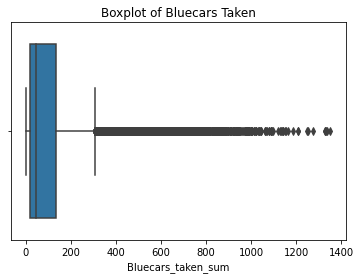

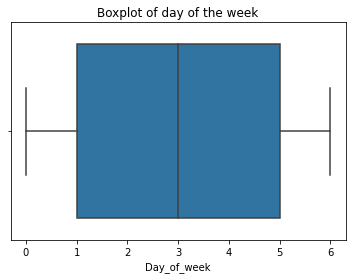

In [287]:
#checking for outliers
sns.boxplot(x ='Bluecars_taken_sum', data = df)
plt.title('Boxplot of Bluecars Taken')
plt.show()

sns.boxplot(x = 'Day_of_week', data = df)
plt.title('Boxplot of day of the week')
plt.show()


in the column of blue cars taken we have a number of outliers but we will not drop them, because doing so will affect the dataset.

##Data Analysis



###a)UNIVARIATE

In [288]:
df.columns

Index(['Postal_code', 'Date', 'Day_of_week', 'Day_type', 'Bluecars_taken_sum'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of blue cars taken')

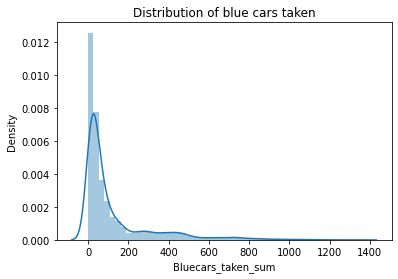

In [289]:
#let's see the distribution of blue cars taken
sns.distplot(df['Bluecars_taken_sum'], bins=None)
plt.title('Distribution of blue cars taken')


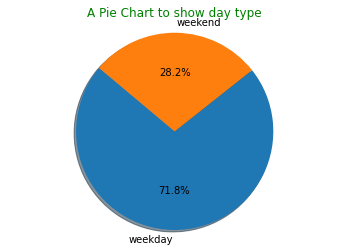

In [290]:

#Distribution of weekdays and weekend
DAY=df['Day_type'].value_counts()
#creating labels
Labels= DAY.index
#values
Data = DAY.values
plt.pie(Data, labels = Labels, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('A Pie Chart to show day type', color = 'green')
plt.show()

we have only two days in the weekend and 5 days in the weekday, therefore weekday have a large propotion

In [291]:
#let's see the day of the week entries
print(df['Day_of_week'].unique())

[0 1 2 3 4 5 6]


In [292]:
#creating a frequency table for day of the week

day= pd.crosstab(index = df['Day_of_week'], columns = 'count')
day

col_0,count
Day_of_week,
0,2374
1,2363
2,2268
3,2268
4,2271
5,2267
6,2274


Monday and Tuesday has the higest entries followed by Sunday. The day with least number of entries is saturday

In [293]:
#let's see the postal codes entries
print(df['Postal_code'].unique())

[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]


In [294]:
Postal= pd.crosstab(index = df['Postal_code'], columns = 'count')
Postal

col_0,count
Postal_code,
75001,156
75002,156
75003,156
75004,156
75005,156
...,...
94700,156
94800,156
95100,156


All areas has equal number of entries

####*measures of central tendancy*

In [295]:
#let's calculate the summary statistics of the variables using the describe() function
df.describe()

,Postal_code,Day_of_week,Bluecars_taken_sum
count,16085.000000,16085.000000,16085.000000
mean,88791.293876,2.969599,125.926951
std,7647.342000,2.008378,185.426579
min,75001.000000,0.000000,0.000000
25%,91330.000000,1.000000,20.000000
50%,92340.000000,3.000000,46.000000
75%,93400.000000,5.000000,135.000000
max,95880.000000,6.000000,1352.000000


In [296]:
#let's find the mode of Bluecars_taken_sum 

print("mode of the sum of blue cars taken is "  +  str(df['Bluecars_taken_sum'].mode()))

mode of the sum of blue cars taken is 0    12
dtype: int64


In [297]:
#lets find the median
print("median of the sum of blue cars taken is "  +  str(df['Bluecars_taken_sum'].median()))

median of the sum of blue cars taken is 46.0


####*Measures of Dispersion/Variability/Spread*

In [298]:
#let"s see the spread of data in the blue cars taken column
Max = df['Bluecars_taken_sum'].max()
Min = df['Bluecars_taken_sum'].min()
Range = Max - Min
print("range: " +str(Range))
#quartiles
Q=df['Bluecars_taken_sum'].quantile([0.25,0.5,0.75])
print("quartiles: " +str(Q))
#standard deviation
Stdv=df['Bluecars_taken_sum'].std()
print("standard deviation: " + str(Stdv))
#variance
Vr=df['Bluecars_taken_sum'].var()
print("variance: " +str(Vr))
#skweness
Sk=df['Bluecars_taken_sum'].skew()
print("skweness: " +str(Sk))
#kurtosis
Krt=df['Bluecars_taken_sum'].kurt()
print("kurtosis: " +str(Krt))

range: 1352
quartiles: 0.25     20.0
0.50     46.0
0.75    135.0
Name: Bluecars_taken_sum, dtype: float64
standard deviation: 185.42657876727893
variance: 34383.01611333789
skweness: 2.4063548974959086
kurtosis: 6.172692305510042


first quartile=20

second quartile=46

third quartile=135

standard deviation=185.42657876727893
this is high std dev, showing that the sum of bluecars are not hghly concentrated around the mean.

variance=34383.01611333789
this is a very high variance compared to the mean of 125.926951. This indicates that the blue car  values are highly spread out


skewness= 2.4063548974959086
the data has a positive skewness, meaning it has a right longer tail

kurtosis=6.172692305510042
this value is greater than 3  meaning Leptokurtic  distributions, which means that data is heavy-tailed .

###b)BIVARIATE

In [299]:

#let's see the relationship between day type and cars picked
df.groupby(['Day_type']).agg({'Bluecars_taken_sum': ['sum']})


,Bluecars_taken_sum
,sum
Day_type,
weekday,1339435
weekend,686100


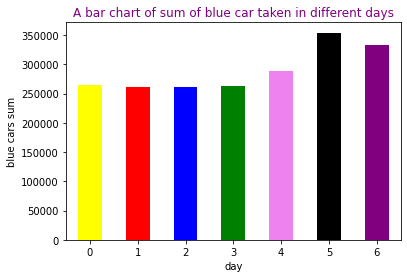

In [300]:

cars_by_day=df.groupby(['Day_of_week'])
total_by_day =cars_by_day['Bluecars_taken_sum'].agg([np.sum]).reset_index()
total_by_day.plot(kind='bar' ,x='Day_of_week',y='sum',rot=0, legend=False, 
                  color=('yellow','red','blue','green','violet','black','purple'))
plt.title('A bar chart of sum of blue car taken in different days', color = 'purple')
plt.xlabel('day')
plt.ylabel('blue cars sum')
plt.show()

saturday has the higest sum followed by sunday and friday respectively. the other 4 days had equal or very close sums

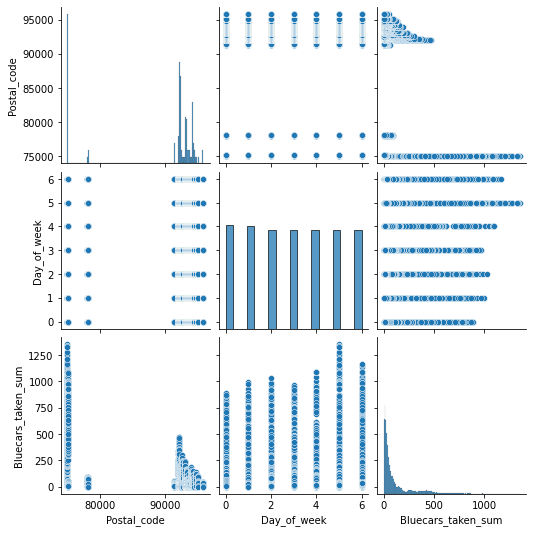

In [301]:
#plotting a pairplot
sns.pairplot(df)
plt.show()

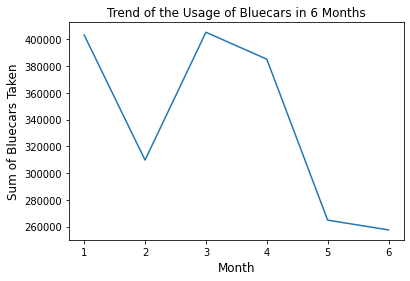

In [303]:
#let's see the trend of blue cars across the six months
#we start by creating a new column named month
df['Month'] =pd.DatetimeIndex(df['Date']).month
#let's see the new column
df.head()
#let's plot the trend line
df.groupby('Month')['Bluecars_taken_sum'].sum().plot()
plt.xlabel('Month', fontsize = 12, color = 'black')
plt.ylabel('Sum of Bluecars Taken', fontsize = 12, color = 'black')
plt.title('Trend of the Usage of Bluecars in 6 Months')

plt.show()


there was a drastic  drop of the usage in the month of february, this could be due to the winter season.

####*correlation*

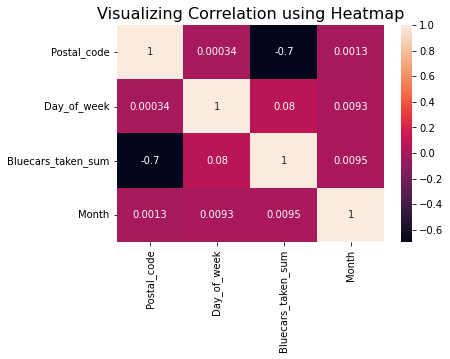

In [304]:
#heatmap to show correlation
sns.heatmap(df.corr(),annot=True)
plt.title('Visualizing Correlation using Heatmap', fontsize = 16, color = 'black' )
plt.show()

there is a strong negative correlation between postal_code and blue cars taken

##Solution Implementation

In [322]:
#importing libraries
import scipy.stats as stats
from scipy.stats import shapiro
from statsmodels.stats import weightstats as stests
from statsmodels.stats.weightstats import ztest as ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [305]:
df.head()

,Postal_code,Date,Day_of_week,Day_type,Bluecars_taken_sum,Month
0,75001,2018-01-01,0,weekday,110,1
1,75001,2018-01-02,1,weekday,98,1
2,75001,2018-01-03,2,weekday,138,1
3,75001,2018-01-04,3,weekday,104,1
4,75001,2018-01-05,4,weekday,114,1


In [306]:
#we will start by performing stratified sampling 
df1= df.groupby('Day_type', group_keys=False).apply(lambda grouped_subset : 
                                                    grouped_subset.sample(frac=0.1))
df1

,Postal_code,Date,Day_of_week,Day_type,Bluecars_taken_sum,Month
25,75001,2018-01-26,4,weekday,145,1
10173,93110,2018-02-20,1,weekday,23,2
10020,93100,2018-02-23,4,weekday,105,2
6409,92230,2018-01-17,2,weekday,46,1
6504,92230,2018-04-25,2,weekday,51,4
...,...,...,...,...,...,...
4852,92120,2018-01-20,5,weekend,110,1
12423,93500,2018-03-25,6,weekend,53,3
6681,92240,2018-05-27,6,weekend,113,5
6582,92240,2018-02-03,5,weekend,89,2


In [316]:
#extracting data for weekend
# Extract day type data
df_wknd = df1[df1.Day_type == 'weekend']
df_wknd

,Postal_code,Date,Day_of_week,Day_type,Bluecars_taken_sum,Month
11747,93360,2018-04-14,5,weekend,30,4
2880,75019,2018-03-17,5,weekend,706,3
9519,92600,2018-01-21,6,weekend,221,1
769,75005,2018-06-09,5,weekend,412,6
11904,93370,2018-04-21,5,weekend,5,4
...,...,...,...,...,...,...
4852,92120,2018-01-20,5,weekend,110,1
12423,93500,2018-03-25,6,weekend,53,3
6681,92240,2018-05-27,6,weekend,113,5
6582,92240,2018-02-03,5,weekend,89,2


In [317]:
#extracting data for weekdays
# Extract day type data
df_wkday = df1[df1.Day_type == 'weekday']
df_wkday

,Postal_code,Date,Day_of_week,Day_type,Bluecars_taken_sum,Month
25,75001,2018-01-26,4,weekday,145,1
10173,93110,2018-02-20,1,weekday,23,2
10020,93100,2018-02-23,4,weekday,105,2
6409,92230,2018-01-17,2,weekday,46,1
6504,92230,2018-04-25,2,weekday,51,4
...,...,...,...,...,...,...
1249,75009,2018-01-02,1,weekday,266,1
11119,93260,2018-04-09,0,weekday,24,4
13955,94150,2018-02-23,4,weekday,18,2
8596,92380,2018-02-01,3,weekday,25,2


In [320]:
#let's do a normality test on both subsets
#we start with weekend subset
stat, p = shapiro(df_wknd.Bluecars_taken_sum)
print('Statistic = %.3f, p = %.3f' % (stat, p))


# The confidence interval is defined as alpha
alpha = 0.05
if p > alpha:
  print('The bluecars taken follows a normal distribution')
else:
  print('The data does not follow a normal distribution')



Statistic = 0.679, p = 0.000
The data does not follow a normal distribution


In [321]:
#let's test the normality of weekday subset
stat, p = shapiro(df_wkday.Bluecars_taken_sum)
print('Statistic = %.3f, p = %.3f' % (stat, p))


# The confidence interval is defined as alpha
alpha = 0.05
if p > alpha:
  print('The bluecars taken follows a normal distribution')
else:
  print('The data does not follow a normal distribution')

Statistic = 0.664, p = 0.000
The data does not follow a normal distribution


In [327]:
#let's do the hypothesis test using the z statistics
ztest, p_value = stests.ztest(df_wknd['Bluecars_taken_sum'], x2 = df_wkday['Bluecars_taken_sum'], value = 0, alternative = 'two-sided')
print('p_value : ', float(p_value))

if p_value < 0.05:
  print('We reject the null hypothesis')
else:
  print('We fail to reject the null hypothesis')

p_value :  6.1068632144455e-05
We reject the null hypothesis


Therefore there is enough evidence to support that the number of bluecars taken on weekends is greater than the mean of cars taken during weekdays